# Tables

In [5]:
# Include necessary packages
library(tidyverse)

# library(mvtnorm)
library(condMVNorm)
library(MomTrunc)
# library(truncnorm)
# library(tmvtnorm)
# library(TTmoment)
library(mclust)

library(doParallel)
# library(parallel)

library(ggpubr)

path=getwd()
source(paste0(substring(path, 
                        1, 
                        tail(unlist(gregexpr(pattern ='/',path)),n=1)),
              "MixCenMVReg_EM.R"))

source(paste0(substring(path, 
                        1, 
                        tail(unlist(gregexpr(pattern ='/',path)),n=1)),
              "Util_Func.R"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: mvtnorm

Package 'mclust' version 5.4.8
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘mclust’


The following object is masked from ‘package:mvtnorm’:

    dmvnorm


The following object is masked from ‘package:purrr’:

    map


Loading required package: foreach


Attaching package: ‘foreach’


The following objects are masked from ‘package:purrr’:

    accumulate, when


Loading required package: iterators

Loading required package: parallel



## Truth

In [1]:
load('true_pars.RData')
load('data_true_r51n1000.RData')

PIE=true_pars$PIE
BETA=true_pars$BETA
SIGMA=true_pars$SIGMA

In [3]:
start=Sys.time()

no_cores=detectCores(logical = TRUE)  
# returns the number of available hardware threads, 
# and if it is FALSE, returns the number of physical cores

cl=makeCluster(10)  
registerDoParallel(cl)  

replicate=length(data_true)


true_bias=foreach(i=1:replicate, .errorhandling="pass") %dopar% {
  
    library(condMVNorm)
    library(MomTrunc)
    MixCenMVReg_EM(Y=data_true[[i]]$Y,
                   X=data_true[[i]]$X,
                   C=0*data_true[[i]]$Y, 
                   G=3, pie_hat=true_pars$PIE, beta_hat=true_pars$BETA, sigma_hat=true_pars$SIGMA,
                   Max.iter=1000, diff.tol=1e-3, print=FALSE, calc_cov=FALSE)
}
stopCluster(cl)
# save(model1.1,file = "model1.1.RData")
Sys.time()-start

save(true_bias,file='true_bias_r51n1000.RData')

Time difference of 55.32809 secs

In [4]:
true_bias[[1]]

,Y1,Y2
X0,2.0121563,20.21273
X1,-0.1747788,-1.89726
,Y1,Y2
X0,3.0124479,24.966462
X1,0.9755351,-2.981723
,Y1,Y2
X0,3.49064,30.22362
X1,1.99523,-4.91079
,Y1,Y2
Y1,0.8854225,0.1030616


In [5]:
# load('case1_cens_bias_r51n1000.RData')
MODS=true_bias
# print(length(MODS))
pies=list()
n=0
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        pies[[i]]=(MODS[[i]]$Pie)
        n=n+1
    }
        
}
print(n)

betas_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        betas_diff[[i]]=unlist(lapply(Map('-',MODS[[i]]$Beta,BETA),norm,type="F"))
    }
}

sigma_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        sigma_diff[[i]]=unlist(lapply(Map('-',MODS[[i]]$Sigma,SIGMA),norm,type="F"))
    }
}


extract_lowertri=function(mat){
    return(mat[lower.tri(mat, diag = TRUE)])
}

para_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        
        a=as.matrix(c(MODS[[i]]$Pie, unlist(lapply(MODS[[i]]$Beta, as.vector)), unlist(lapply(MODS[[i]]$Sigma, extract_lowertri))))

        b=as.matrix(c(PIE, unlist(lapply(BETA, as.vector)), unlist(lapply(SIGMA, extract_lowertri))))

        para_diff[[i]]=norm(a-b,type="F")
#         pie_diff[[i]]=unlist(lapply(Map('-',as.matrix(MODS[[i]]$Pie),as.matrix(PIE)),abs))
#         print(pie_diff)
    }
}

round(apply(rbind(t(do.call('rbind',pies)),
                  do.call('cbind',betas_diff),
                  do.call('cbind',sigma_diff),
                  do.call('cbind',para_diff)),1,mean),2)

round(apply(rbind(t(do.call('rbind',pies)),
                  do.call('cbind',betas_diff),
                  do.call('cbind',sigma_diff),
                  do.call('cbind',para_diff)),1,sd),2)

which.quantile = function (x, probs, na.rm = FALSE){
  if (! na.rm & any (is.na (x)))
  return (rep (NA_integer_, length (probs)))

  o = order (x)
  n = sum (! is.na (x))
  o = o [seq_len (n)]

  nppm <- n * probs - 0.5
  j = floor(nppm)
  h = ifelse((nppm == j) & ((j%%2L) == 0L), 0, 1)
  j = j + h

  j [j == 0] <- 1
  o[j]
}
med_case=which.quantile(unlist(para_diff),0.5)

[1] 51


pie1   pie2   pie3  beta1  beta2  beta3 sigma1 sigma2 sigma3        
  0.10   0.70   0.20   0.19   0.08   0.17   0.23   0.10   0.21   0.42

pie1   pie2   pie3  beta1  beta2  beta3 sigma1 sigma2 sigma3        
  0.00   0.01   0.01   0.08   0.03   0.07   0.10   0.05   0.09   0.09

## Case-1

In [6]:
load('case1_cens_bias_r51n1000.RData')
MODS=case1_cens_bias
# print(length(MODS))
pies=list()
n=0
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        pies[[i]]=(MODS[[i]]$Pie)
        n=n+1
    }
        
}
print(n)

betas_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        betas_diff[[i]]=unlist(lapply(Map('-',MODS[[i]]$Beta,BETA),norm,type="F"))
    }
}

sigma_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        sigma_diff[[i]]=unlist(lapply(Map('-',MODS[[i]]$Sigma,SIGMA),norm,type="F"))
    }
}


extract_lowertri=function(mat){
    return(mat[lower.tri(mat, diag = TRUE)])
}

para_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        
        a=as.matrix(c(MODS[[i]]$Pie, unlist(lapply(MODS[[i]]$Beta, as.vector)), unlist(lapply(MODS[[i]]$Sigma, extract_lowertri))))

        b=as.matrix(c(PIE, unlist(lapply(BETA, as.vector)), unlist(lapply(SIGMA, extract_lowertri))))

        para_diff[[i]]=norm(a-b,type="F")
#         pie_diff[[i]]=unlist(lapply(Map('-',as.matrix(MODS[[i]]$Pie),as.matrix(PIE)),abs))
#         print(pie_diff)
    }
}

ARI=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        
        ARI[[i]]=adjustedRandIndex(MODS[[i]]$Class,data_true[[i]]$Labels)
#         pie_diff[[i]]=unlist(lapply(Map('-',as.matrix(MODS[[i]]$Pie),as.matrix(PIE)),abs))
#         print(pie_diff)
    }
}

round(apply(rbind(t(do.call('rbind',pies)),
                  do.call('cbind',betas_diff),
                  do.call('cbind',sigma_diff),
                  do.call('cbind',para_diff),
                  do.call('cbind',ARI)),1,mean),2)

round(apply(rbind(t(do.call('rbind',pies)),
                  do.call('cbind',betas_diff),
                  do.call('cbind',sigma_diff),
                  do.call('cbind',para_diff),
                  do.call('cbind',ARI)),1,sd),2)

[1] 51


pie1   pie2   pie3  beta1  beta2  beta3 sigma1 sigma2 sigma3               
  0.10   0.70   0.20   0.19   0.08   0.27   0.22   0.10   0.33   0.56   0.89

pie1   pie2   pie3  beta1  beta2  beta3 sigma1 sigma2 sigma3               
  0.00   0.01   0.01   0.08   0.03   0.15   0.10   0.05   0.20   0.18   0.01

In [8]:
str(MODS[[1]])

List of 12
 $ Iterations: num 13
 $ Converged : logi TRUE
 $ LogLik    : num -3310
 $ AIC       : num 6665
 $ BIC       : num 6778
 $ ICL       : num 6923
 $ Pie       : Named num [1:3] 0.106 0.699 0.196
  ..- attr(*, "names")= chr [1:3] "pie1" "pie2" "pie3"
 $ Beta      :List of 3
  ..$ beta1: num [1:2, 1:2] 2.008 -0.176 20.219 -1.899
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:2] "X0" "X1"
  .. .. ..$ : chr [1:2] "Y1" "Y2"
  ..$ beta2: num [1:2, 1:2] 3.013 0.965 24.973 -2.992
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:2] "X0" "X1"
  .. .. ..$ : chr [1:2] "Y1" "Y2"
  ..$ beta3: num [1:2, 1:2] 3.49 2 30.17 -4.87
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:2] "X0" "X1"
  .. .. ..$ : chr [1:2] "Y1" "Y2"
 $ Sigma     :List of 3
  ..$ sigma1: num [1:2, 1:2] 0.894 0.096 0.096 1.444
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:2] "Y1" "Y2"
  .. .. ..$ : chr [1:2] "Y1" "Y2"
  ..$ sigma2: num [1:2, 1:2] 1.898 0.19 0.19 0.433
  .. 

In [11]:
load('case1_unce_bias_r51n1000.RData')
MODS=case1_unce_bias
# print(length(MODS))
pies=list()
n=0
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        pies[[i]]=(MODS[[i]]$Pie)
        n=n+1
    }
        
}
print(n)

betas_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        betas_diff[[i]]=unlist(lapply(Map('-',MODS[[i]]$Beta,BETA),norm,type="F"))
    }
}

sigma_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        sigma_diff[[i]]=unlist(lapply(Map('-',MODS[[i]]$Sigma,SIGMA),norm,type="F"))
    }
}


extract_lowertri=function(mat){
    return(mat[lower.tri(mat, diag = TRUE)])
}

para_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        
        a=as.matrix(c(MODS[[i]]$Pie, unlist(lapply(MODS[[i]]$Beta, as.vector)), unlist(lapply(MODS[[i]]$Sigma, extract_lowertri))))

        b=as.matrix(c(PIE, unlist(lapply(BETA, as.vector)), unlist(lapply(SIGMA, extract_lowertri))))

        para_diff[[i]]=norm(a-b,type="F")
#         pie_diff[[i]]=unlist(lapply(Map('-',as.matrix(MODS[[i]]$Pie),as.matrix(PIE)),abs))
#         print(pie_diff)
    }
}

ARI=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        
        ARI[[i]]=adjustedRandIndex(MODS[[i]]$Class,data_true[[i]]$Labels)
#         pie_diff[[i]]=unlist(lapply(Map('-',as.matrix(MODS[[i]]$Pie),as.matrix(PIE)),abs))
#         print(pie_diff)
    }
}

round(apply(rbind(t(do.call('rbind',pies)),
                  do.call('cbind',betas_diff),
                  do.call('cbind',sigma_diff),
                  do.call('cbind',para_diff),
                  do.call('cbind',ARI)),1,mean),2)

round(apply(rbind(t(do.call('rbind',pies)),
                  do.call('cbind',betas_diff),
                  do.call('cbind',sigma_diff),
                  do.call('cbind',para_diff),
                  do.call('cbind',ARI)),1,sd),2)

[1] 51


pie1   pie2   pie3  beta1  beta2  beta3 sigma1 sigma2 sigma3               
  0.10   0.72   0.18   0.34   0.20   3.25   0.48   0.15   0.68   3.41   0.83

pie1   pie2   pie3  beta1  beta2  beta3 sigma1 sigma2 sigma3               
  0.00   0.02   0.02   0.19   0.05   0.32   0.37   0.07   0.27   0.33   0.02

In [12]:
str(MODS[[1]])

List of 12
 $ Iterations: num 70
 $ Converged : logi TRUE
 $ LogLik    : num -3493
 $ AIC       : num 7033
 $ BIC       : num 7145
 $ ICL       : num 7392
 $ Pie       : Named num [1:3] 0.108 0.701 0.191
  ..- attr(*, "names")= chr [1:3] "pie1" "pie2" "pie3"
 $ Beta      :List of 3
  ..$ beta1: num [1:2, 1:2] 1.9813 -0.0794 20.267 -1.9675
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:2] "X0" "X1"
  .. .. ..$ : chr [1:2] "Y1" "Y2"
  ..$ beta2: num [1:2, 1:2] 3.09 1.03 24.94 -2.88
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:2] "X0" "X1"
  .. .. ..$ : chr [1:2] "Y1" "Y2"
  ..$ beta3: num [1:2, 1:2] 3.6 1.89 28.2 -1.49
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:2] "X0" "X1"
  .. .. ..$ : chr [1:2] "Y1" "Y2"
 $ Sigma     :List of 3
  ..$ sigma1: num [1:2, 1:2] 0.9306 0.0341 0.0341 1.5174
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:2] "Y1" "Y2"
  .. .. ..$ : chr [1:2] "Y1" "Y2"
  ..$ sigma2: num [1:2, 1:2] 1.879 0.182 0.182 0.478

In [8]:
load('case1_dltc_bias_r51n1000.RData')
load('data_cens_case1_r51n1000.RData')
MODS=case1_dltc_bias
# print(length(MODS))
pies=list()
n=0
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        pies[[i]]=(MODS[[i]]$Pie)
        n=n+1
    }
        
}
print(n)

betas_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        betas_diff[[i]]=unlist(lapply(Map('-',MODS[[i]]$Beta,BETA),norm,type="F"))
    }
}

sigma_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        sigma_diff[[i]]=unlist(lapply(Map('-',MODS[[i]]$Sigma,SIGMA),norm,type="F"))
    }
}


extract_lowertri=function(mat){
    return(mat[lower.tri(mat, diag = TRUE)])
}

para_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        
        a=as.matrix(c(MODS[[i]]$Pie, unlist(lapply(MODS[[i]]$Beta, as.vector)), unlist(lapply(MODS[[i]]$Sigma, extract_lowertri))))

        b=as.matrix(c(PIE, unlist(lapply(BETA, as.vector)), unlist(lapply(SIGMA, extract_lowertri))))

        para_diff[[i]]=norm(a-b,type="F")
#         pie_diff[[i]]=unlist(lapply(Map('-',as.matrix(MODS[[i]]$Pie),as.matrix(PIE)),abs))
#         print(pie_diff)
    }
}



ARI=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        nocensor=(data_cens_case1[[i]]$censorID[,1]==0 & data_cens_case1[[i]]$censorID[,2]==0)
        
        ARI[[i]]=adjustedRandIndex(MODS[[i]]$Class,data_true[[i]]$Labels[nocensor])

    }
}

round(apply(rbind(t(do.call('rbind',pies)),
                  do.call('cbind',betas_diff),
                  do.call('cbind',sigma_diff),
                  do.call('cbind',para_diff),
                  do.call('cbind',ARI)),1,mean),2)

round(apply(rbind(t(do.call('rbind',pies)),
                  do.call('cbind',betas_diff),
                  do.call('cbind',sigma_diff),
                  do.call('cbind',para_diff),
                  do.call('cbind',ARI)),1,sd),2)

[1] 51


pie1   pie2   pie3  beta1  beta2  beta3 sigma1 sigma2 sigma3               
  0.12   0.78   0.11   0.21   0.16   1.38   0.26   0.22   0.71   1.67   0.91

pie1   pie2   pie3  beta1  beta2  beta3 sigma1 sigma2 sigma3               
  0.00   0.01   0.01   0.08   0.05   0.75   0.11   0.08   0.29   0.69   0.02

In [9]:
load('case1_gmm_bias_r51n1000.RData')
B=BETA
for(i in 1:length(B)){
    B[[i]]=t(matrix(B[[i]][1,]))
}
# load('data_cens_case1_r51n1000.RData')
MODS=case1_gmm_bias
# print(length(MODS))
pies=list()
n=0
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        pies[[i]]=(MODS[[i]]$Pie)
        n=n+1
    }
        
}
print(n)

betas_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        betas_diff[[i]]=unlist(lapply(Map('-',MODS[[i]]$Beta,B),norm,type="F"))
    }
}

sigma_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        sigma_diff[[i]]=unlist(lapply(Map('-',MODS[[i]]$Sigma,SIGMA),norm,type="F"))
    }
}


extract_lowertri=function(mat){
    return(mat[lower.tri(mat, diag = TRUE)])
}

para_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        
        a=as.matrix(c(MODS[[i]]$Pie, unlist(lapply(MODS[[i]]$Beta, as.vector)), unlist(lapply(MODS[[i]]$Sigma, extract_lowertri))))

        b=as.matrix(c(PIE, unlist(lapply(B, as.vector)), unlist(lapply(SIGMA, extract_lowertri))))

        para_diff[[i]]=norm(a-b,type="F")
#         pie_diff[[i]]=unlist(lapply(Map('-',as.matrix(MODS[[i]]$Pie),as.matrix(PIE)),abs))
#         print(pie_diff)
    }
}



ARI=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
#         nocensor=(data_cens_case1[[i]]$censorID[,1]==0 & data_cens_case1[[i]]$censorID[,2]==0)
        
        ARI[[i]]=adjustedRandIndex(MODS[[i]]$Class,data_true[[i]]$Labels)

    }
}

round(apply(rbind(t(do.call('rbind',pies)),
                  do.call('cbind',betas_diff),
                  do.call('cbind',sigma_diff),
                  do.call('cbind',para_diff),
                  do.call('cbind',ARI)),1,mean),2)

round(apply(rbind(t(do.call('rbind',pies)),
                  do.call('cbind',betas_diff),
                  do.call('cbind',sigma_diff),
                  do.call('cbind',para_diff),
                  do.call('cbind',ARI)),1,sd),2)

[1] 51


pie1   pie2   pie3  beta1  beta2  beta3 sigma1 sigma2 sigma3               
  0.14   0.56   0.31   1.52   0.76   2.15   5.30   7.59  19.33  21.71   0.30

pie1   pie2   pie3  beta1  beta2  beta3 sigma1 sigma2 sigma3               
  0.08   0.18   0.18   1.36   0.76   1.40   3.82   2.61  11.99  10.32   0.15

## Case-2

In [10]:
load('case2_cens_bias_r51n1000.RData')
MODS=case2_cens_bias
# print(length(MODS))
pies=list()
n=0
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        pies[[i]]=(MODS[[i]]$Pie)
        n=n+1
    }
        
}
print(n)

betas_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        betas_diff[[i]]=unlist(lapply(Map('-',MODS[[i]]$Beta,BETA),norm,type="F"))
    }
}

sigma_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        sigma_diff[[i]]=unlist(lapply(Map('-',MODS[[i]]$Sigma,SIGMA),norm,type="F"))
    }
}


extract_lowertri=function(mat){
    return(mat[lower.tri(mat, diag = TRUE)])
}

para_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        
        a=as.matrix(c(MODS[[i]]$Pie, unlist(lapply(MODS[[i]]$Beta, as.vector)), unlist(lapply(MODS[[i]]$Sigma, extract_lowertri))))

        b=as.matrix(c(PIE, unlist(lapply(BETA, as.vector)), unlist(lapply(SIGMA, extract_lowertri))))

        para_diff[[i]]=norm(a-b,type="F")
#         pie_diff[[i]]=unlist(lapply(Map('-',as.matrix(MODS[[i]]$Pie),as.matrix(PIE)),abs))
#         print(pie_diff)
    }
}

ARI=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){

        ARI[[i]]=adjustedRandIndex(MODS[[i]]$Class,data_true[[i]]$Labels)

    }
}

round(apply(rbind(t(do.call('rbind',pies)),
                  do.call('cbind',betas_diff),
                  do.call('cbind',sigma_diff),
                  do.call('cbind',para_diff),
                  do.call('cbind',ARI)),1,mean),2)

round(apply(rbind(t(do.call('rbind',pies)),
                  do.call('cbind',betas_diff),
                  do.call('cbind',sigma_diff),
                  do.call('cbind',para_diff),
                  do.call('cbind',ARI)),1,sd),2)

[1] 51


pie1   pie2   pie3  beta1  beta2  beta3 sigma1 sigma2 sigma3               
  0.10   0.70   0.20   0.23   0.11   0.55   0.35   0.14   0.52   0.94   0.68

pie1   pie2   pie3  beta1  beta2  beta3 sigma1 sigma2 sigma3               
  0.00   0.01   0.01   0.10   0.04   0.33   0.16   0.06   0.35   0.34   0.02

In [11]:
load('case2_unce_bias_r51n1000.RData')
MODS=case2_unce_bias
# print(length(MODS))
pies=list()
n=0
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        pies[[i]]=(MODS[[i]]$Pie)
        n=n+1
    }
        
}
print(n)

betas_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        betas_diff[[i]]=unlist(lapply(Map('-',MODS[[i]]$Beta,BETA),norm,type="F"))
    }
}

sigma_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        sigma_diff[[i]]=unlist(lapply(Map('-',MODS[[i]]$Sigma,SIGMA),norm,type="F"))
    }
}


extract_lowertri=function(mat){
    return(mat[lower.tri(mat, diag = TRUE)])
}

para_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        
        a=as.matrix(c(MODS[[i]]$Pie, unlist(lapply(MODS[[i]]$Beta, as.vector)), unlist(lapply(MODS[[i]]$Sigma, extract_lowertri))))

        b=as.matrix(c(PIE, unlist(lapply(BETA, as.vector)), unlist(lapply(SIGMA, extract_lowertri))))

        para_diff[[i]]=norm(a-b,type="F")
#         pie_diff[[i]]=unlist(lapply(Map('-',as.matrix(MODS[[i]]$Pie),as.matrix(PIE)),abs))
#         print(pie_diff)
    }
}

ARI=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        
        ARI[[i]]=adjustedRandIndex(MODS[[i]]$Class,data_true[[i]]$Labels)

    }
}

round(apply(rbind(t(do.call('rbind',pies)),
                  do.call('cbind',betas_diff),
                  do.call('cbind',sigma_diff),
                  do.call('cbind',para_diff),
                  do.call('cbind',ARI)),1,mean),2)

round(apply(rbind(t(do.call('rbind',pies)),
                  do.call('cbind',betas_diff),
                  do.call('cbind',sigma_diff),
                  do.call('cbind',para_diff),
                  do.call('cbind',ARI)),1,sd),2)

[1] 51


pie1   pie2   pie3  beta1  beta2  beta3 sigma1 sigma2 sigma3               
  0.38   0.33   0.28   3.52   1.23   6.09   3.09   2.50   2.25   8.62   0.08

pie1   pie2   pie3  beta1  beta2  beta3 sigma1 sigma2 sigma3               
  0.05   0.08   0.07   0.27   0.44   0.45   0.24   1.35   0.69   0.43   0.05

In [12]:
load('case2_dltc_bias_r51n1000.RData')
load('data_cens_case2_r51n1000.RData')
MODS=case2_dltc_bias
# print(length(MODS))
pies=list()
n=0
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        pies[[i]]=(MODS[[i]]$Pie)
        n=n+1
    }
        
}
print(n)

betas_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        betas_diff[[i]]=unlist(lapply(Map('-',MODS[[i]]$Beta,BETA),norm,type="F"))
    }
}

sigma_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        sigma_diff[[i]]=unlist(lapply(Map('-',MODS[[i]]$Sigma,SIGMA),norm,type="F"))
    }
}


extract_lowertri=function(mat){
    return(mat[lower.tri(mat, diag = TRUE)])
}

para_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        
        a=as.matrix(c(MODS[[i]]$Pie, unlist(lapply(MODS[[i]]$Beta, as.vector)), unlist(lapply(MODS[[i]]$Sigma, extract_lowertri))))

        b=as.matrix(c(PIE, unlist(lapply(BETA, as.vector)), unlist(lapply(SIGMA, extract_lowertri))))

        para_diff[[i]]=norm(a-b,type="F")
#         pie_diff[[i]]=unlist(lapply(Map('-',as.matrix(MODS[[i]]$Pie),as.matrix(PIE)),abs))
#         print(pie_diff)
    }
}

ARI=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        nocensor=(data_cens_case2[[i]]$censorID[,1]==0 & data_cens_case2[[i]]$censorID[,2]==0)
        
        ARI[[i]]=adjustedRandIndex(MODS[[i]]$Class,data_true[[i]]$Labels[nocensor])

    }
}

round(apply(rbind(t(do.call('rbind',pies)),
                  do.call('cbind',betas_diff),
                  do.call('cbind',sigma_diff),
                  do.call('cbind',para_diff),
                  do.call('cbind',ARI)),1,mean),2)

round(apply(rbind(t(do.call('rbind',pies)),
                  do.call('cbind',betas_diff),
                  do.call('cbind',sigma_diff),
                  do.call('cbind',para_diff),
                  do.call('cbind',ARI)),1,sd),2)

[1] 51


pie1   pie2   pie3  beta1  beta2  beta3 sigma1 sigma2 sigma3               
  0.09   0.72   0.19   1.36   0.90   4.83   1.06   0.93   0.76   5.45   0.72

pie1   pie2   pie3  beta1  beta2  beta3 sigma1 sigma2 sigma3               
  0.02   0.08   0.08   0.37   0.12   1.34   0.63   0.21   0.41   1.12   0.12

In [13]:
load('case2_gmm_bias_r51n1000.RData')
B=BETA
for(i in 1:length(B)){
    B[[i]]=t(matrix(B[[i]][1,]))
}
# load('data_cens_case1_r51n1000.RData')
MODS=case2_gmm_bias
# print(length(MODS))
pies=list()
n=0
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        pies[[i]]=(MODS[[i]]$Pie)
        n=n+1
    }
        
}
print(n)

betas_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        betas_diff[[i]]=unlist(lapply(Map('-',MODS[[i]]$Beta,B),norm,type="F"))
    }
}

sigma_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        sigma_diff[[i]]=unlist(lapply(Map('-',MODS[[i]]$Sigma,SIGMA),norm,type="F"))
    }
}


extract_lowertri=function(mat){
    return(mat[lower.tri(mat, diag = TRUE)])
}

para_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        
        a=as.matrix(c(MODS[[i]]$Pie, unlist(lapply(MODS[[i]]$Beta, as.vector)), unlist(lapply(MODS[[i]]$Sigma, extract_lowertri))))

        b=as.matrix(c(PIE, unlist(lapply(B, as.vector)), unlist(lapply(SIGMA, extract_lowertri))))

        para_diff[[i]]=norm(a-b,type="F")
#         pie_diff[[i]]=unlist(lapply(Map('-',as.matrix(MODS[[i]]$Pie),as.matrix(PIE)),abs))
#         print(pie_diff)
    }
}



ARI=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
#         nocensor=(data_cens_case1[[i]]$censorID[,1]==0 & data_cens_case1[[i]]$censorID[,2]==0)
        
        ARI[[i]]=adjustedRandIndex(MODS[[i]]$Class,data_true[[i]]$Labels)

    }
}

round(apply(rbind(t(do.call('rbind',pies)),
                  do.call('cbind',betas_diff),
                  do.call('cbind',sigma_diff),
                  do.call('cbind',para_diff),
                  do.call('cbind',ARI)),1,mean),2)

round(apply(rbind(t(do.call('rbind',pies)),
                  do.call('cbind',betas_diff),
                  do.call('cbind',sigma_diff),
                  do.call('cbind',para_diff),
                  do.call('cbind',ARI)),1,sd),2)

[1] 51


pie1   pie2   pie3  beta1  beta2  beta3 sigma1 sigma2 sigma3               
  0.12   0.60   0.28   2.06   0.96   2.10  16.37   7.37   3.42  19.78   0.17

pie1   pie2   pie3  beta1  beta2  beta3 sigma1 sigma2 sigma3               
  0.05   0.14   0.14   2.95   0.75   0.91  31.98   2.64   2.22  30.86   0.05

## Case-3

In [14]:
load('case3_cens_bias_r51n1000.RData')
MODS=case3_cens_bias
# print(length(MODS))
pies=list()
n=0
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        pies[[i]]=(MODS[[i]]$Pie)
        n=n+1
    }
        
}
print(n)

betas_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        betas_diff[[i]]=unlist(lapply(Map('-',MODS[[i]]$Beta,BETA),norm,type="F"))
    }
}

sigma_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        sigma_diff[[i]]=unlist(lapply(Map('-',MODS[[i]]$Sigma,SIGMA),norm,type="F"))
    }
}


extract_lowertri=function(mat){
    return(mat[lower.tri(mat, diag = TRUE)])
}

para_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        
        a=as.matrix(c(MODS[[i]]$Pie, unlist(lapply(MODS[[i]]$Beta, as.vector)), unlist(lapply(MODS[[i]]$Sigma, extract_lowertri))))

        b=as.matrix(c(PIE, unlist(lapply(BETA, as.vector)), unlist(lapply(SIGMA, extract_lowertri))))

        para_diff[[i]]=norm(a-b,type="F")
#         pie_diff[[i]]=unlist(lapply(Map('-',as.matrix(MODS[[i]]$Pie),as.matrix(PIE)),abs))
#         print(pie_diff)
    }
}

ARI=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        
        ARI[[i]]=adjustedRandIndex(MODS[[i]]$Class,data_true[[i]]$Labels)

    }
}

round(apply(rbind(t(do.call('rbind',pies)),
                  do.call('cbind',betas_diff),
                  do.call('cbind',sigma_diff),
                  do.call('cbind',para_diff),
                  do.call('cbind',ARI)),1,mean),2)

round(apply(rbind(t(do.call('rbind',pies)),
                  do.call('cbind',betas_diff),
                  do.call('cbind',sigma_diff),
                  do.call('cbind',para_diff),
                  do.call('cbind',ARI)),1,sd),2)

[1] 51


pie1   pie2   pie3  beta1  beta2  beta3 sigma1 sigma2 sigma3               
  0.10   0.70   0.20   0.68   0.19   1.05   0.86   0.24   0.82   1.90   0.50

pie1   pie2   pie3  beta1  beta2  beta3 sigma1 sigma2 sigma3               
  0.00   0.04   0.04   0.52   0.08   0.91   0.59   0.13   0.52   0.96   0.02

In [15]:
load('case3_unce_bias_r51n1000.RData')
MODS=case3_unce_bias
# print(length(MODS))
pies=list()
n=0
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        pies[[i]]=(MODS[[i]]$Pie)
        n=n+1
    }
        
}
print(n)

betas_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        betas_diff[[i]]=unlist(lapply(Map('-',MODS[[i]]$Beta,BETA),norm,type="F"))
    }
}

sigma_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        sigma_diff[[i]]=unlist(lapply(Map('-',MODS[[i]]$Sigma,SIGMA),norm,type="F"))
    }
}


extract_lowertri=function(mat){
    return(mat[lower.tri(mat, diag = TRUE)])
}

para_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        
        a=as.matrix(c(MODS[[i]]$Pie, unlist(lapply(MODS[[i]]$Beta, as.vector)), unlist(lapply(MODS[[i]]$Sigma, extract_lowertri))))

        b=as.matrix(c(PIE, unlist(lapply(BETA, as.vector)), unlist(lapply(SIGMA, extract_lowertri))))

        para_diff[[i]]=norm(a-b,type="F")
#         pie_diff[[i]]=unlist(lapply(Map('-',as.matrix(MODS[[i]]$Pie),as.matrix(PIE)),abs))
#         print(pie_diff)
    }
}

ARI=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        
        ARI[[i]]=adjustedRandIndex(MODS[[i]]$Class,data_true[[i]]$Labels)

    }
}

round(apply(rbind(t(do.call('rbind',pies)),
                  do.call('cbind',betas_diff),
                  do.call('cbind',sigma_diff),
                  do.call('cbind',para_diff),
                  do.call('cbind',ARI)),1,mean),2)

round(apply(rbind(t(do.call('rbind',pies)),
                  do.call('cbind',betas_diff),
                  do.call('cbind',sigma_diff),
                  do.call('cbind',para_diff),
                  do.call('cbind',ARI)),1,sd),2)

[1] 51


pie1   pie2   pie3  beta1  beta2  beta3 sigma1 sigma2 sigma3               
  0.71   0.15   0.13   3.56   2.53   6.49   1.46   1.76   1.11   8.35   0.00

pie1   pie2   pie3  beta1  beta2  beta3 sigma1 sigma2 sigma3               
  0.02   0.04   0.03   0.06   0.75   0.97   0.07   0.19   0.50   0.65   0.02

In [16]:
load('case3_dltc_bias_r51n1000.RData')
load('data_cens_case3_r51n1000.RData')
MODS=case3_dltc_bias
# print(length(MODS))
pies=list()
n=0
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        pies[[i]]=(MODS[[i]]$Pie)
        n=n+1
    }
        
}
print(n)

betas_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        betas_diff[[i]]=unlist(lapply(Map('-',MODS[[i]]$Beta,BETA),norm,type="F"))
    }
}

sigma_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        sigma_diff[[i]]=unlist(lapply(Map('-',MODS[[i]]$Sigma,SIGMA),norm,type="F"))
    }
}


extract_lowertri=function(mat){
    return(mat[lower.tri(mat, diag = TRUE)])
}

para_diff=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        
        a=as.matrix(c(MODS[[i]]$Pie, unlist(lapply(MODS[[i]]$Beta, as.vector)), unlist(lapply(MODS[[i]]$Sigma, extract_lowertri))))

        b=as.matrix(c(PIE, unlist(lapply(BETA, as.vector)), unlist(lapply(SIGMA, extract_lowertri))))

        para_diff[[i]]=norm(a-b,type="F")
#         pie_diff[[i]]=unlist(lapply(Map('-',as.matrix(MODS[[i]]$Pie),as.matrix(PIE)),abs))
#         print(pie_diff)
    }
}

ARI=list()
for(i in 1:length(MODS)){
    if(length(MODS[[i]])>2){
        nocensor=(data_cens_case3[[i]]$censorID[,1]==0 & data_cens_case3[[i]]$censorID[,2]==0)
        
        ARI[[i]]=adjustedRandIndex(MODS[[i]]$Class,data_true[[i]]$Labels[nocensor])

    }
}

round(apply(rbind(t(do.call('rbind',pies)),
                  do.call('cbind',betas_diff),
                  do.call('cbind',sigma_diff),
                  do.call('cbind',para_diff),
                  do.call('cbind',ARI)),1,mean),2)

round(apply(rbind(t(do.call('rbind',pies)),
                  do.call('cbind',betas_diff),
                  do.call('cbind',sigma_diff),
                  do.call('cbind',para_diff),
                  do.call('cbind',ARI)),1,sd),2)

[1] 39


pie1   pie2   pie3  beta1  beta2  beta3 sigma1 sigma2 sigma3               
  0.03   0.67   0.30   3.69   1.76   5.44   1.30   1.46   1.05   7.44   0.40

pie1   pie2   pie3  beta1  beta2  beta3 sigma1 sigma2 sigma3               
  0.02   0.14   0.14   2.87   0.31   1.49   0.16   0.26   0.34   2.52   0.19

# Plots

In [17]:
defaultW=getOption("warn")
options(warn = -1)


defaultplotw=getOption("repr.plot.width")
defaultploth=getOption("repr.plot.height")

## SCatter plots

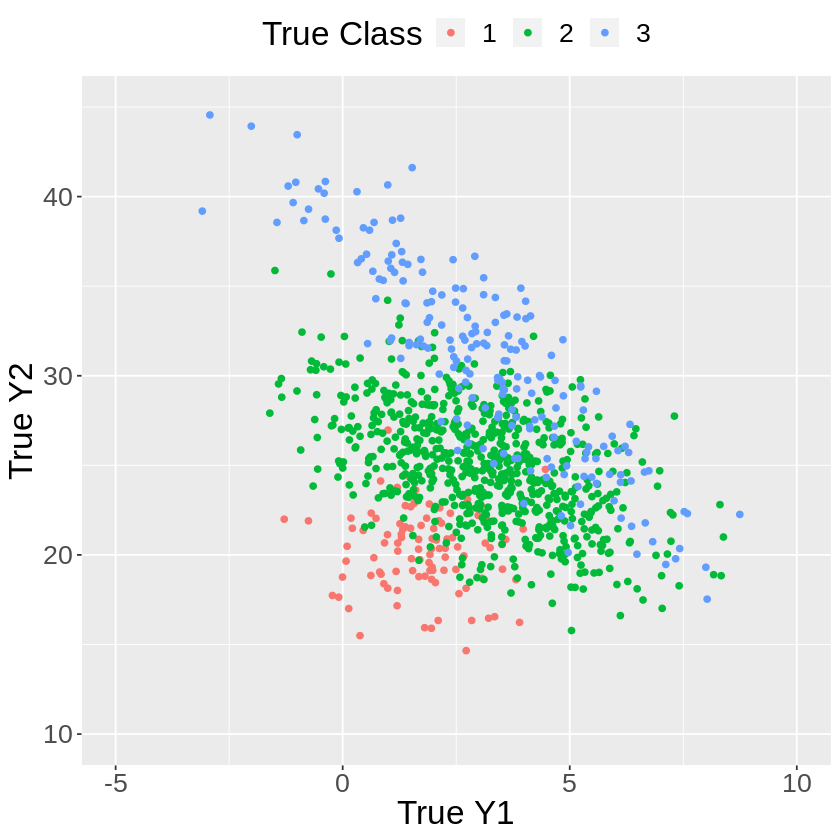

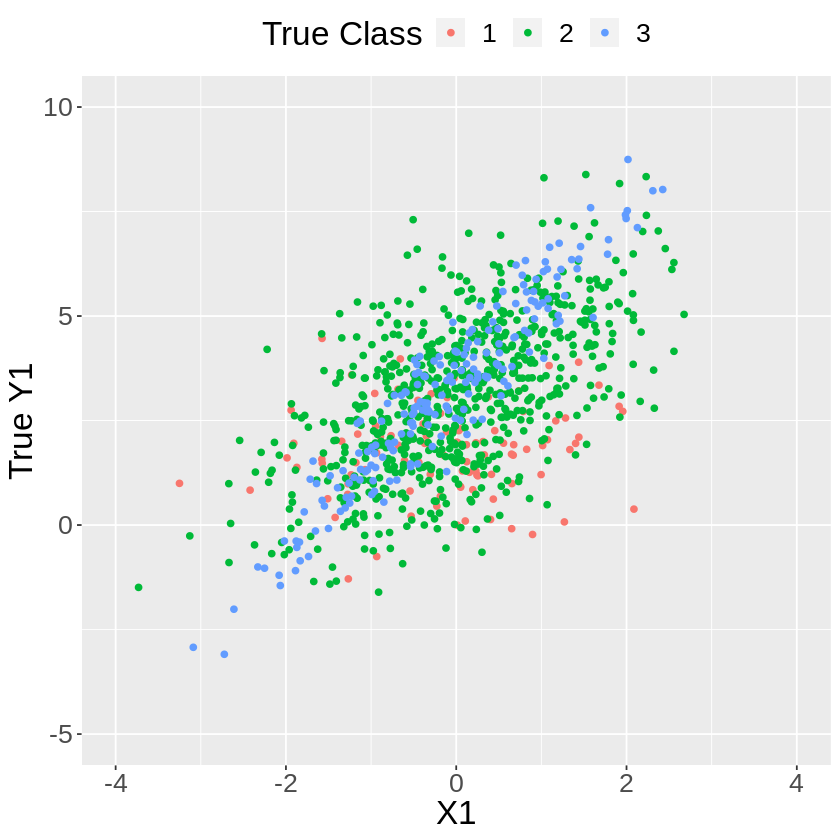

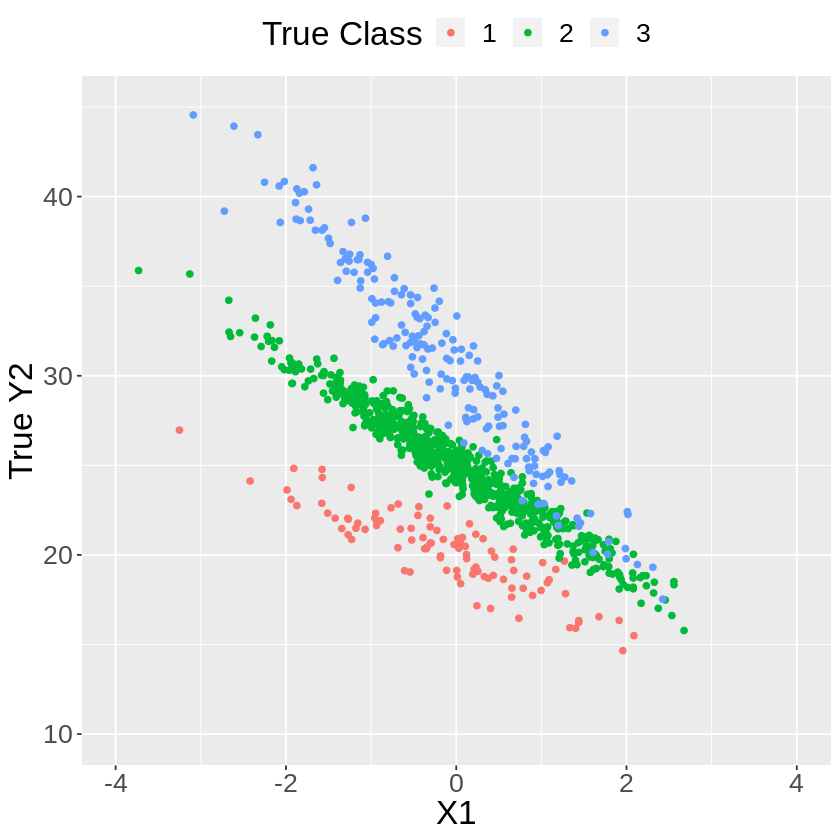

In [18]:


# require(gridExtra)

# True data

data=data_true[[med_case]]
data=cbind(data$Y,data$X,data$Labels)
colnames(data)[5]='Labels'
data=as.data.frame(data)

p1=ggplot(data, aes(x=Y1, y=Y2, color=as.factor(Labels))) +
   geom_point() + scale_color_discrete(name = "True Class")+xlab("True Y1")+ylab("True Y2")+
   lims(x= c(-5,10), y = c(10, 45))+theme(legend.position = "top",text = element_text(size = 20))



p2=ggplot(data, aes(x=X1, y=Y1, color=as.factor(Labels))) +
   geom_point() + scale_color_discrete(name = "True Class")+ylab("True Y1")+
   lims(x= c(-4,4), y = c(-5,10))+theme(legend.position = "top",text = element_text(size = 20))



p3=ggplot(data, aes(x=X1, y=Y2, color=as.factor(Labels))) +
   geom_point() + scale_color_discrete(name = "True Class")+ylab("True Y2")+
   lims(x= c(-4,4), y = c(10,45))+theme(legend.position = "top",text = element_text(size = 20))


p1
p2
p3

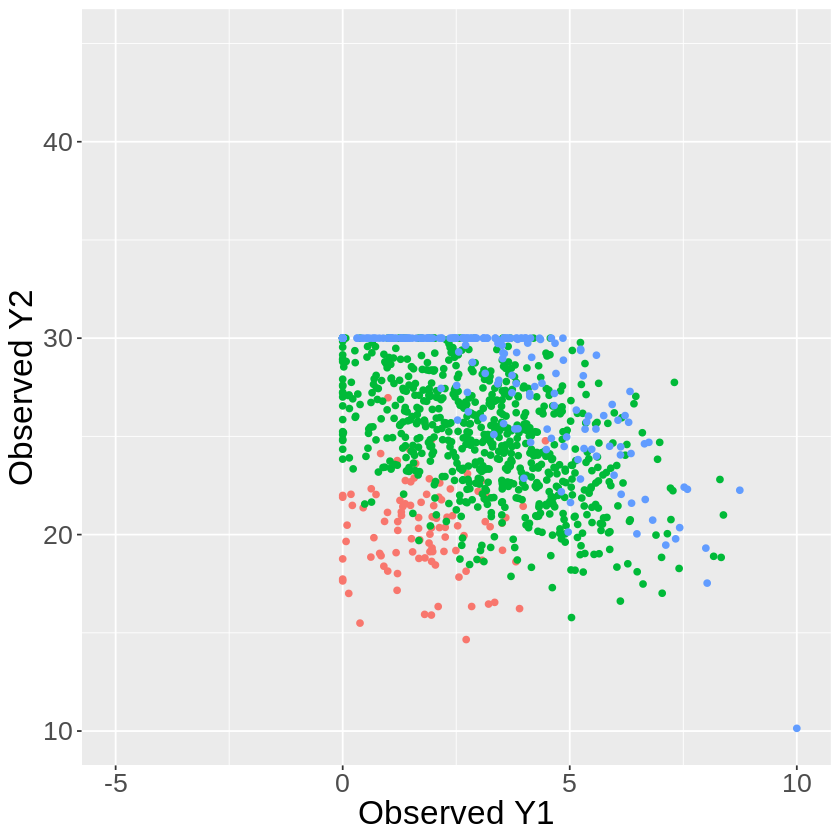

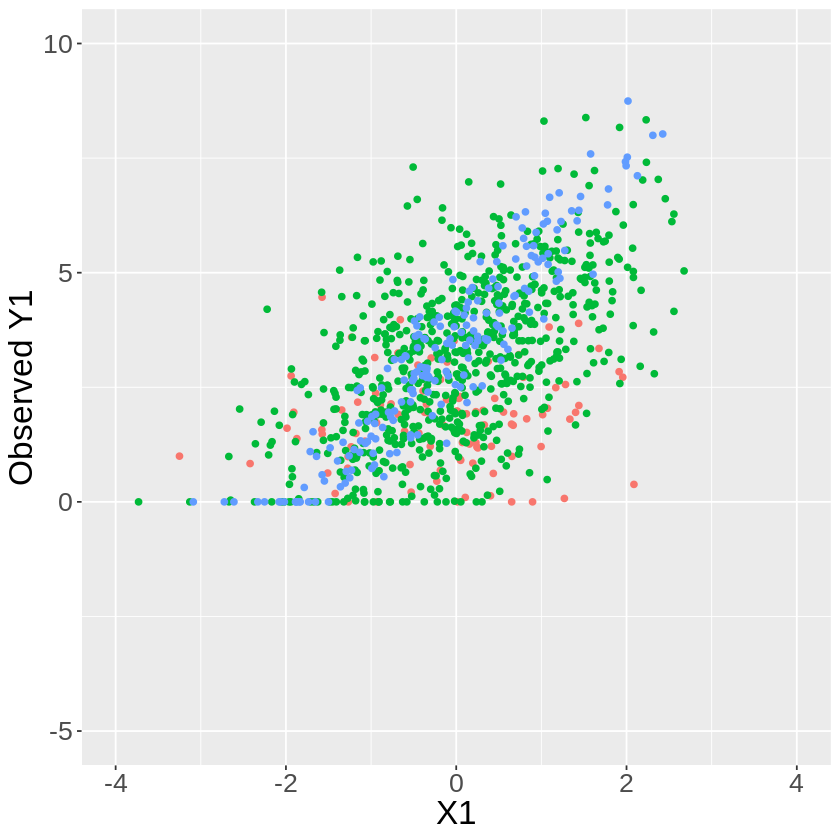

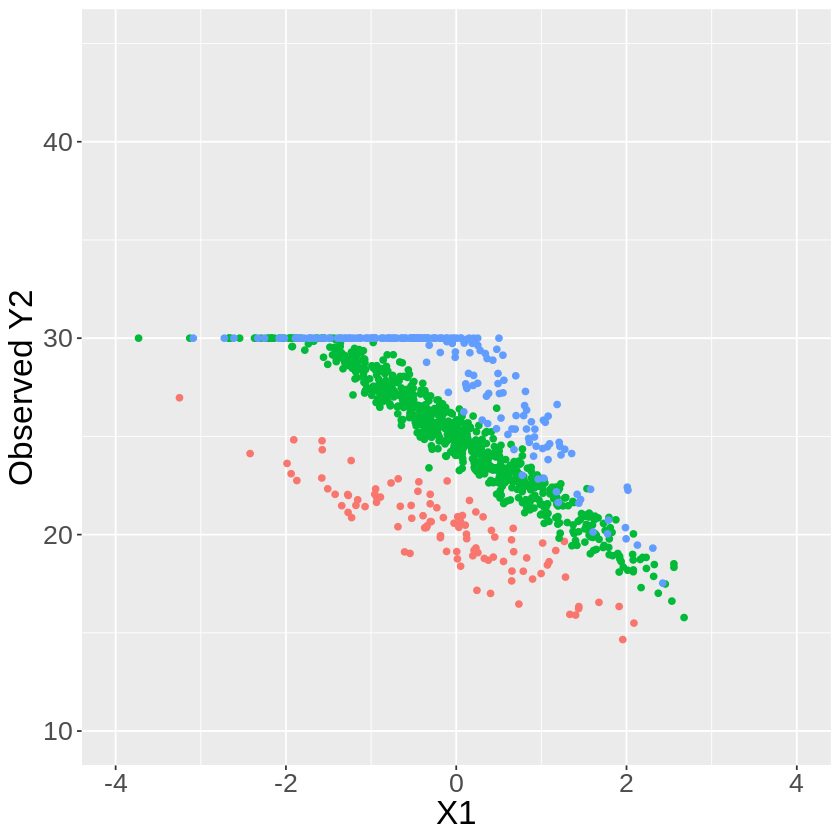

In [19]:
load('data_cens_case1_r51n1000.RData')
# str(data_cens_case1[[med_case]])

data=data_cens_case1[[med_case]]
data=cbind(data$Y,data$X,data$Labels)
colnames(data)[5]='Labels'
data=as.data.frame(data)

p4=ggplot(data, aes(x=Y1, y=Y2, color=as.factor(Labels))) +
   geom_point() + scale_color_discrete(name = "True Class")+xlab("Observed Y1")+ylab("Observed Y2")+
   lims(x= c(-5,10), y = c(10, 45))+theme(legend.position = "none",text = element_text(size = 20))


p5=ggplot(data, aes(x=X1, y=Y1, color=as.factor(Labels))) +
   geom_point() + scale_color_discrete(name = "True Class")+ylab("Observed Y1")+
   lims(x= c(-4,4), y = c(-5,10))+theme(legend.position = "none",text = element_text(size = 20))


p6=ggplot(data, aes(x=X1, y=Y2, color=as.factor(Labels))) +
   geom_point() + scale_color_discrete(name = "True Class")+ylab("Observed Y2")+
   lims(x= c(-4,4), y = c(10,45))+theme(legend.position = "none",text = element_text(size = 20))

p4
p5
p6

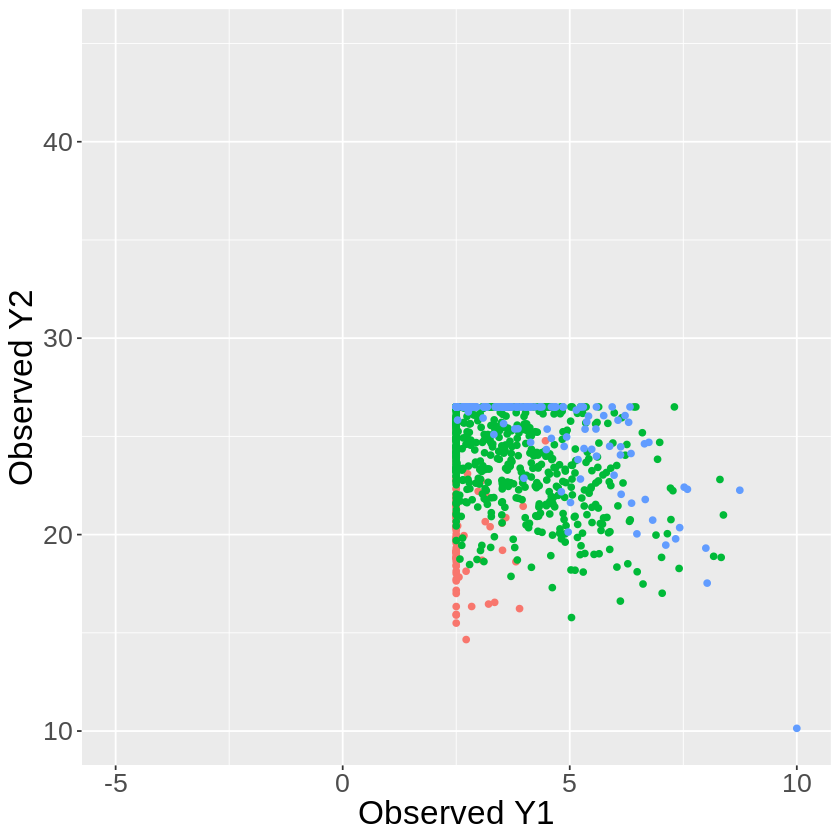

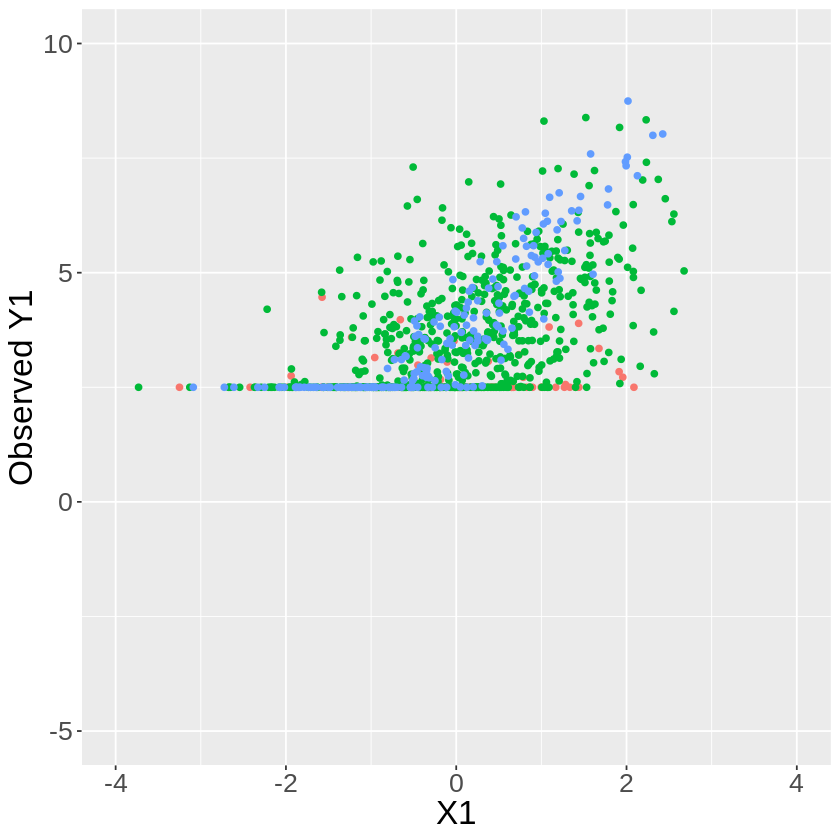

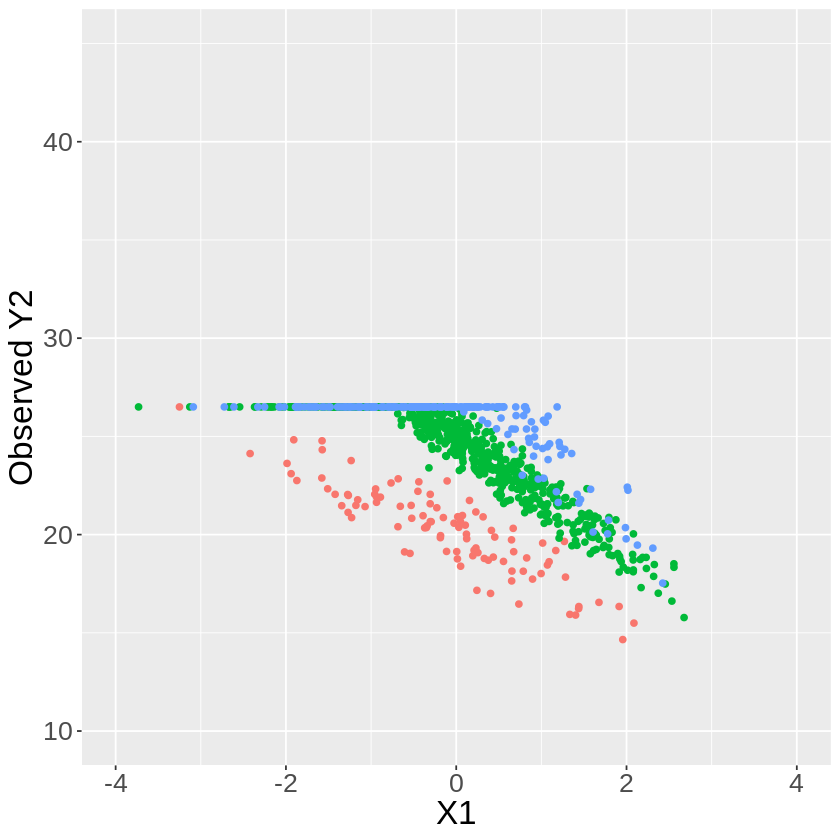

In [20]:
load('data_cens_case2_r51n1000.RData')
# str(data_cens_case1[[med_case]])

data=data_cens_case2[[med_case]]
data=cbind(data$Y,data$X,data$Labels)
colnames(data)[5]='Labels'
data=as.data.frame(data)

p7=ggplot(data, aes(x=Y1, y=Y2, color=as.factor(Labels))) +
   geom_point() + scale_color_discrete(name = "True Class")+xlab("Observed Y1")+ylab("Observed Y2")+
   lims(x= c(-5,10), y = c(10, 45))+theme(legend.position = "none",text = element_text(size = 20))


p8=ggplot(data, aes(x=X1, y=Y1, color=as.factor(Labels))) +
   geom_point() + scale_color_discrete(name = "True Class")+ylab("Observed Y1")+
   lims(x= c(-4,4), y = c(-5,10))+theme(legend.position = "none",text = element_text(size = 20))



p9=ggplot(data, aes(x=X1, y=Y2, color=as.factor(Labels))) +
   geom_point() + scale_color_discrete(name = "True Class")+ylab("Observed Y2")+
   lims(x= c(-4,4), y = c(10,45))+theme(legend.position = "none",text = element_text(size = 20))


p7
p8
p9

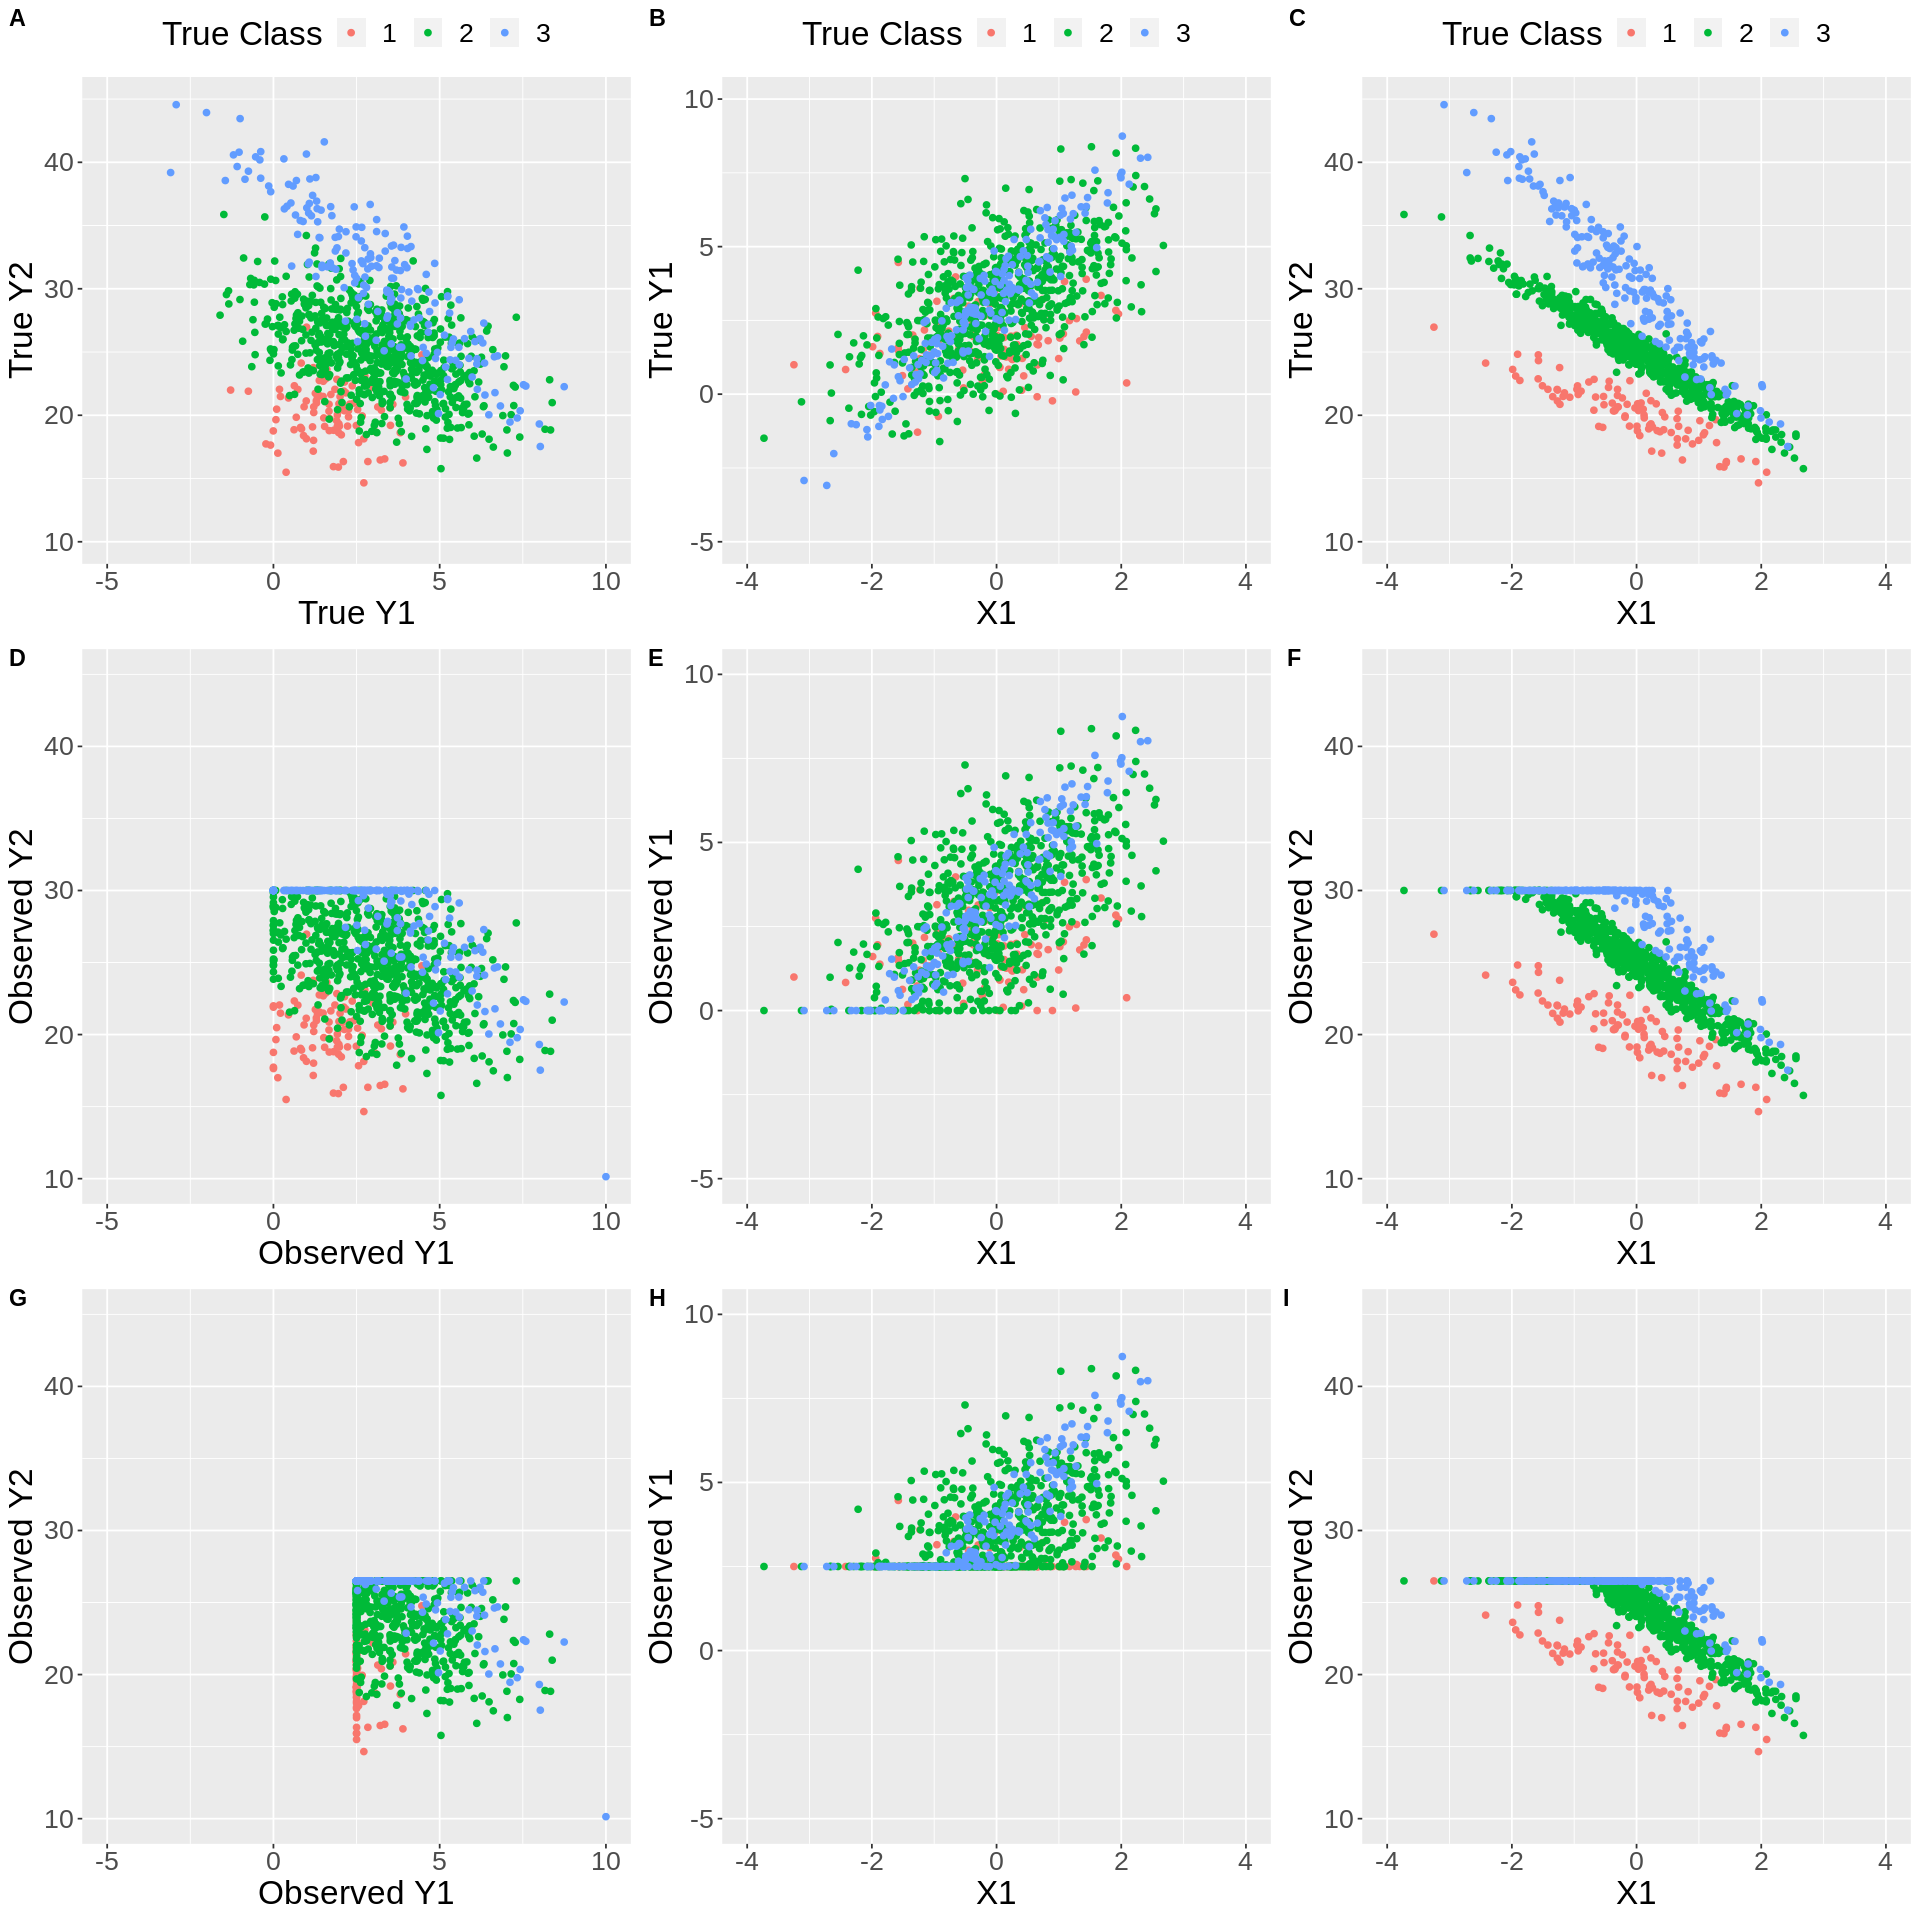

In [21]:


options(repr.plot.width=16, repr.plot.height=16)

ggarrange(p1,p2,p3,p4,p5,p6,p7,p8,p9, 
          labels = c("A","B","C","D","E","F","G","H","I"),
          ncol = 3, nrow = 3)

options(warn = defaultW)
options(repr.plot.width=defaultplotw, repr.plot.height=defaultploth)



## Selecting G

In [22]:
load('SelectG_case1_r51n1000.RData')


Best_case1=list()

AICs=list()
BICs=list()
ICLs=list()
for(g in 1:6){
    AICs[[g]]=rep(NA,51)
    BICs[[g]]=rep(NA,51)
    ICLs[[g]]=rep(NA,51)
    
    Best_case1[[g]]=list()
    for(i in 1:51){
        LogLik=-Inf
        best=NA
        for(j in 1:32){
            if(length(SelectG_case1[[g]][[i]][[j]])==12){
                res=SelectG_case1[[g]][[i]][[j]]
            }
            
            if(res$Converged==TRUE & res$LogLik>LogLik){
                best=res
                LogLik=best$LogLik
            }
        }
        Best_case1[[g]][[i]]=best
        AICs[[g]][i]=best$AIC
        BICs[[g]][i]=best$BIC
        ICLs[[g]][i]=best$ICL
    }    
}

AICs=data.frame(Value = unlist(AICs), G = rep(seq(length(AICs)), lengths(AICs)), Criteria='AIC')

BICs=data.frame(Value = unlist(BICs), G = rep(seq(length(BICs)), lengths(BICs)), Criteria='BIC')

ICLs=data.frame(Value = unlist(ICLs), G = rep(seq(length(ICLs)), lengths(ICLs)), Criteria='ICL')

ICs=rbind(AICs,BICs,ICLs)

ICs$Criteria=as.factor(ICs$Criteria)

options(repr.plot.width=16, repr.plot.height=8)

p1=ggplot(ICs, aes(x=factor(G), y=Value, colour = Criteria))+
    geom_boxplot(outlier.size=0, fill = "white", position="identity", alpha=.5)+
    geom_vline(xintercept = 3, linetype="dotted", color = "gray", size=2)+
    stat_summary(fun.y=median, geom="line", aes(group=Criteria), size=2)+
    scale_x_discrete(name ="Number of Components", limits=1:6)+theme(text = element_text(size = 20))


options(warn = defaultW)
options(repr.plot.width=defaultplotw, repr.plot.height=defaultploth)

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?”


In [23]:
load('SelectG_case2_r51n1000.RData')


Best_case2=list()

AICs=list()
BICs=list()
ICLs=list()
for(g in 1:6){
    AICs[[g]]=rep(NA,51)
    BICs[[g]]=rep(NA,51)
    ICLs[[g]]=rep(NA,51)
    
    Best_case2[[g]]=list()
    for(i in 1:51){
        LogLik=-Inf
        best=NA
        for(j in 1:32){
            if(length(SelectG_case2[[g]][[i]][[j]])==12){
                res=SelectG_case2[[g]][[i]][[j]]
            }
            
            if(res$Converged==TRUE & res$LogLik>LogLik){
                best=res
                LogLik=res$LogLik
            }
        }
        Best_case2[[g]][[i]]=res
        AICs[[g]][i]=res$AIC
        BICs[[g]][i]=res$BIC
        ICLs[[g]][i]=res$ICL
    }    
}

AICs=data.frame(Value = unlist(AICs), G = rep(seq(length(AICs)), lengths(AICs)), Criteria='AIC')

BICs=data.frame(Value = unlist(BICs), G = rep(seq(length(BICs)), lengths(BICs)), Criteria='BIC')

ICLs=data.frame(Value = unlist(ICLs), G = rep(seq(length(ICLs)), lengths(ICLs)), Criteria='ICL')

ICs=rbind(AICs,BICs,ICLs)

ICs$Criteria=as.factor(ICs$Criteria)

options(repr.plot.width=16, repr.plot.height=8)

p2=ggplot(ICs, aes(x=factor(G), y=Value, colour = Criteria))+
    geom_boxplot(outlier.size=0, fill = "white", position="identity", alpha=.5)+
    geom_vline(xintercept = 3, linetype="dotted", color = "gray", size=2)+
    stat_summary(fun.y=median, geom="line", aes(group=Criteria), size=2)+
    scale_x_discrete(name ="Number of Components", limits=1:6)+theme(text = element_text(size = 20))


options(warn = defaultW)
options(repr.plot.width=defaultplotw, repr.plot.height=defaultploth)

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?”


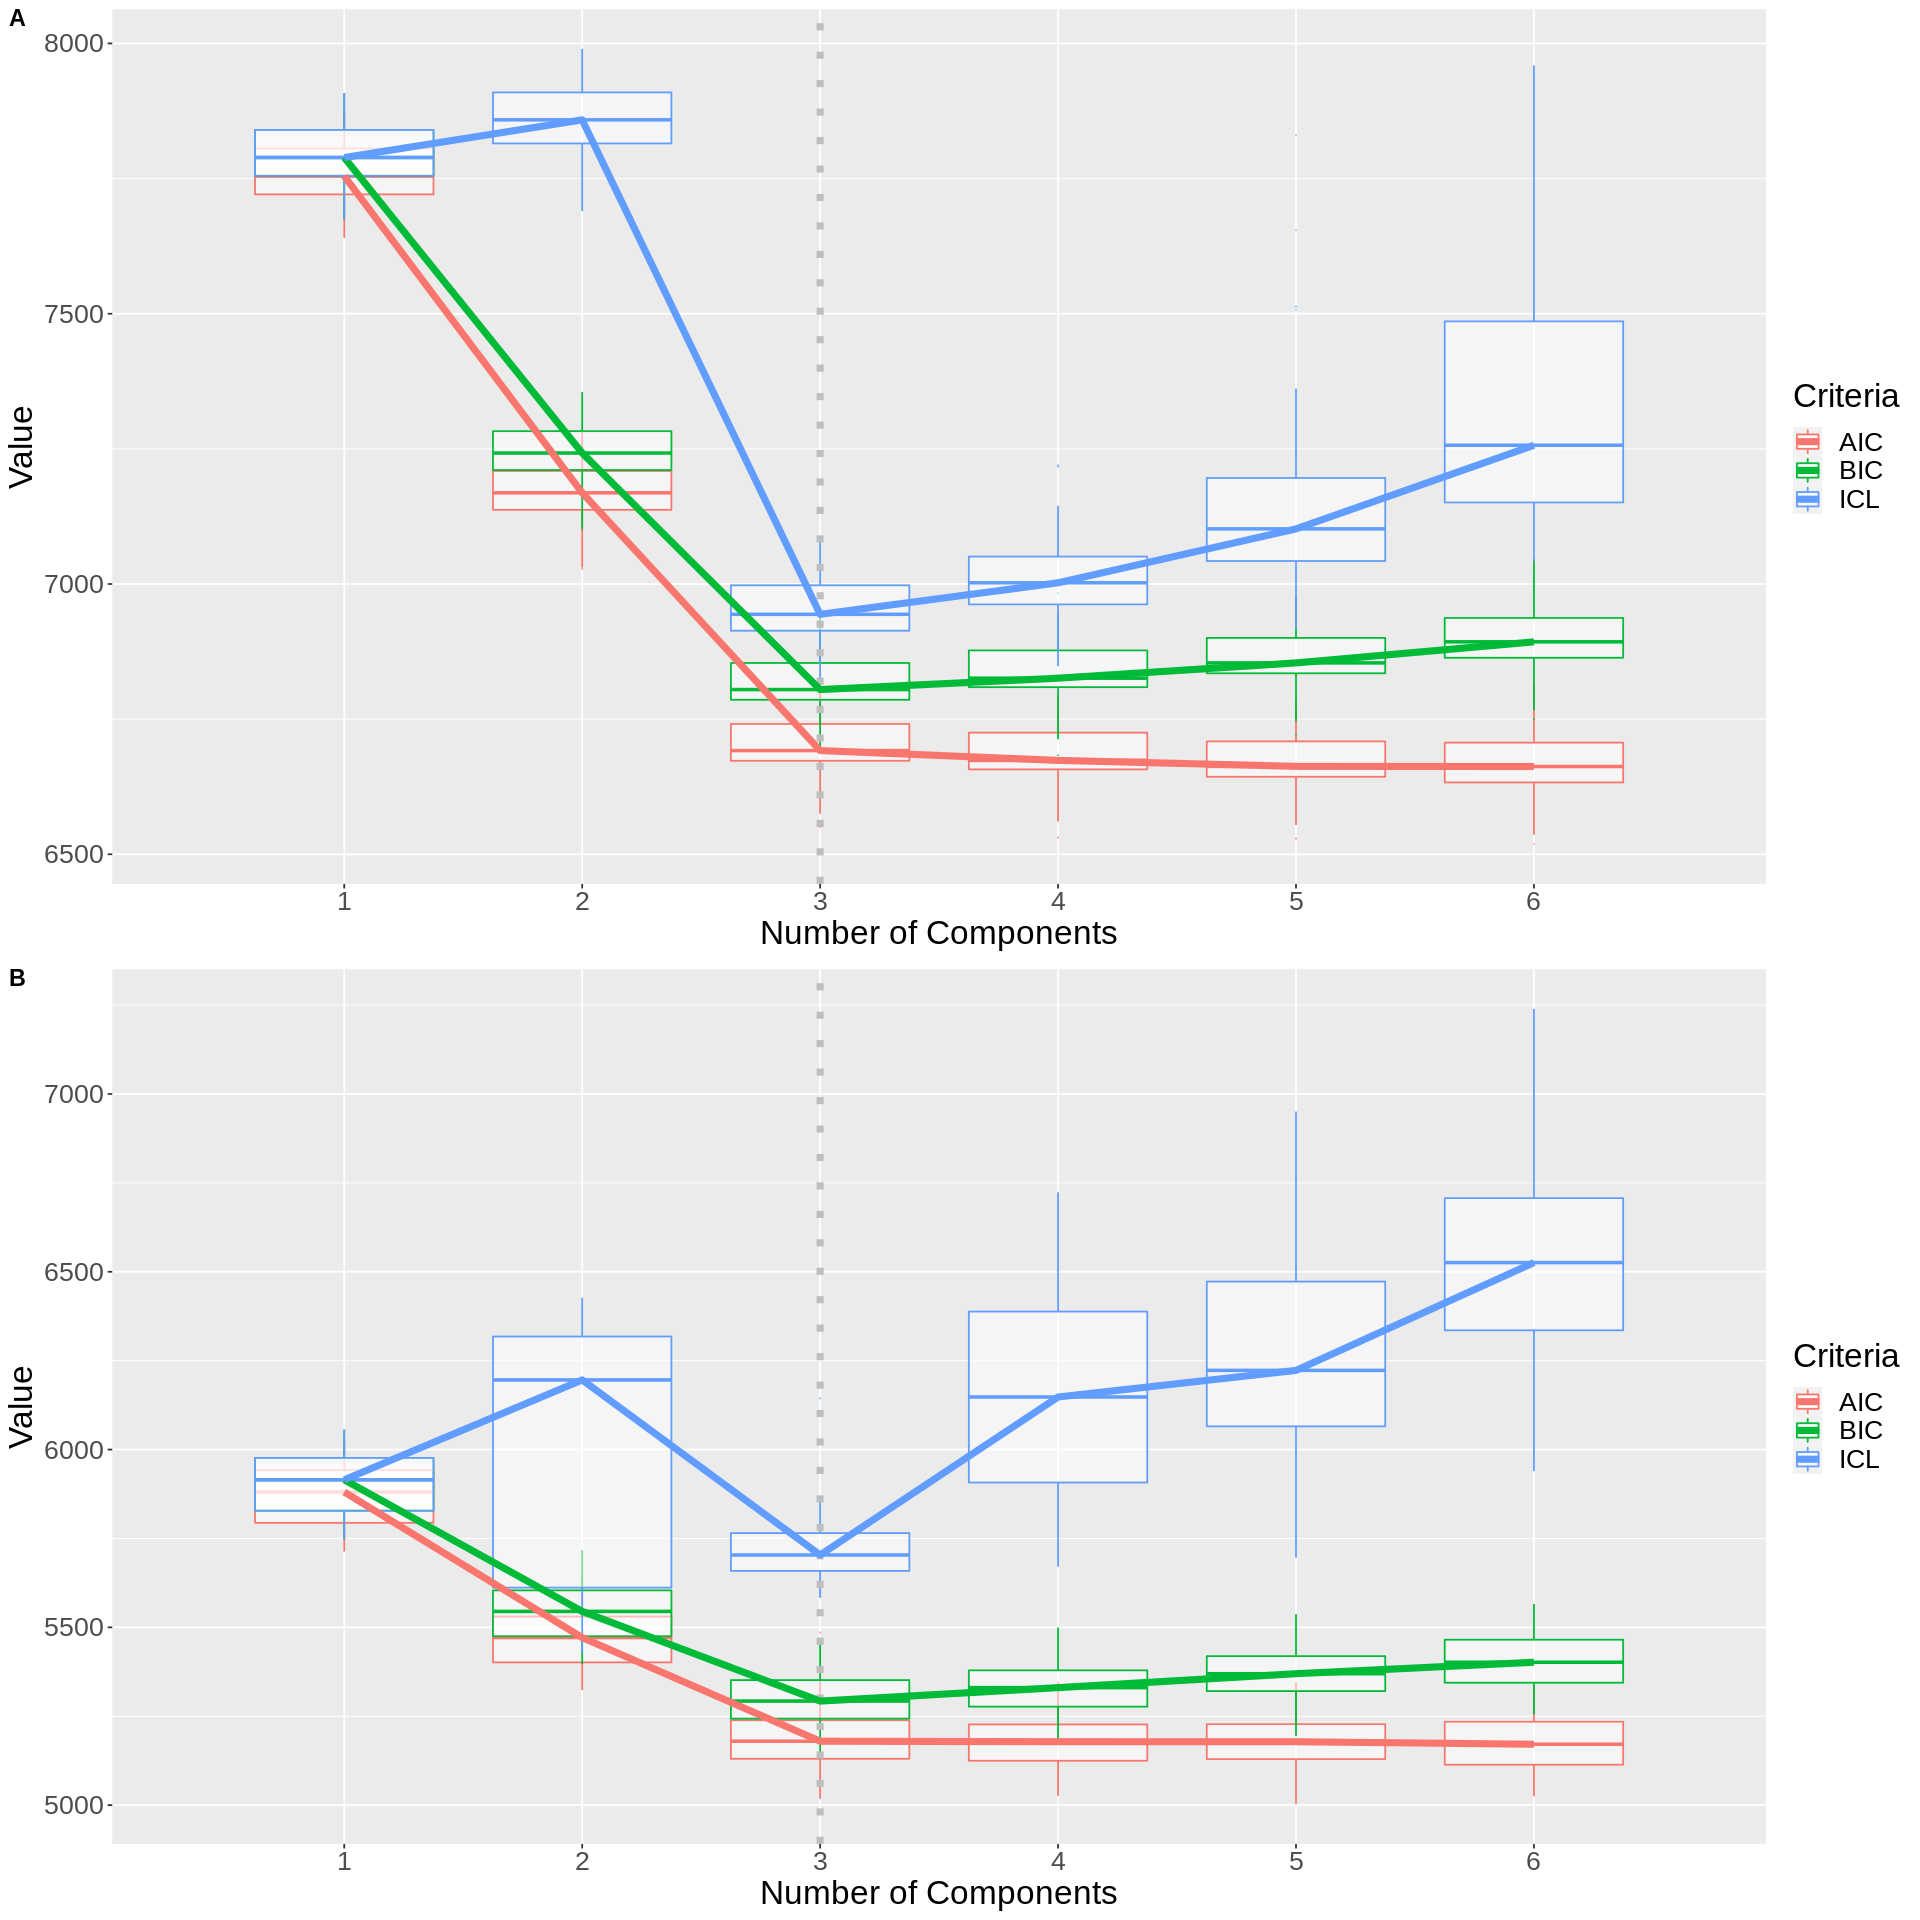

In [24]:
options(repr.plot.width=16, repr.plot.height=16)

ggarrange(p1,p2,
          labels = c("A","B"),
          ncol = 1, nrow = 2)

options(warn = defaultW)
options(repr.plot.width=defaultplotw, repr.plot.height=defaultploth)